In [14]:
from model import eccv16
from dataset import MangaDataset

import torch
import torch.nn as nn

import torch.optim as optim

from skimage import color

from PIL import Image
import numpy as np

In [15]:
mangaDataset = MangaDataset('../colorization-av-enseirb-2020/dataset/one_piece')

datasetLoader = torch.utils.data.DataLoader(mangaDataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)
colorizer_eccv16 = eccv16(pretrained=True).eval()

In [16]:
ipt, target = next(iter(datasetLoader))

In [17]:
IMG_IDX = 0

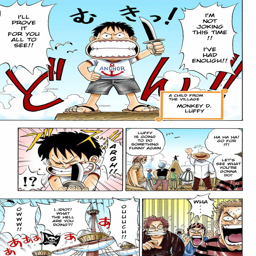

In [18]:
out_lab_orig = torch.cat((ipt[IMG_IDX].unsqueeze(0), target[IMG_IDX].unsqueeze(0)), dim=1)
o=color.lab2rgb(out_lab_orig.data.cpu().numpy()[0,...].transpose((1,2,0)))
im = Image.fromarray(np.uint8(o*255))
im

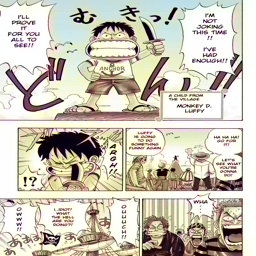

In [19]:
y_pred = colorizer_eccv16(ipt)
out_lab_orig = torch.cat((ipt, y_pred), dim=1)
o=color.lab2rgb(out_lab_orig[0].unsqueeze(0).data.cpu().numpy()[0,...].transpose((1,2,0)))
im = Image.fromarray(np.uint8(o*255))
im